In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("drive/My Drive/DIP")

In [ ]:
!ls

'Emotion Recog.ipynb'   fer2013.csv


In [17]:
data = pd.read_csv('fer2013.csv', delimiter=',')

In [18]:
# 90% Training and 10% Testing
data_train = data[:32298]
data_test = data[32298:]

In [19]:
y_train = data_train['emotion'].values
y_test = data_test['emotion'].values

In [20]:
# Converting string of pixel data to an array
x_train = np.zeros((y_train.shape[0], 48*48))
for i in range(y_train.shape[0]):
    x_train[i] = np.fromstring(data_train['pixels'][i], dtype=int, sep=' ')
    
x_test = np.zeros((y_test.shape[0], 48*48))
for i in range(y_test.shape[0]):
    x_test[i] = np.fromstring(data_test['pixels'][32298+i], dtype=int, sep=' ')

In [21]:
print(x_train.shape)
print(x_test.shape)

(32298, 2304)
(3589, 2304)


In [22]:
# Generate reversed images for every data assuming emotion are symetric
img_rows, img_cols = 48, 48
num_classes = 7

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train_rev = np.flip(x_train, 2)
x_test_rev = np.flip(x_test, 2)

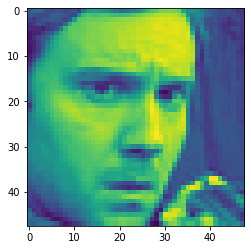

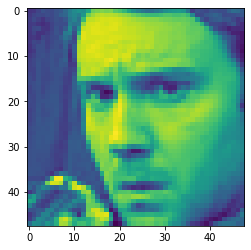

In [23]:
plt.figure(1)
plt.imshow(x_train[0].reshape((48,48)))

plt.figure(2)
plt.imshow(x_train_rev[0].reshape((48,48)))

In [24]:
# Some preprocessing
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train_rev = x_train_rev.astype('float32')
x_test_rev = x_test_rev.astype('float32')
x_train /= 255
x_test /= 255
x_train_rev /= 255
x_test_rev /= 255
print('x_train shape:', x_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)

x_train shape: (32298, 48, 48, 1)
y_train shape: (32298, 7)


In [25]:
# define the model
def cnn_model():
    model = Sequential()

    model.add(BatchNormalization(input_shape=input_shape))

    model.add(Conv2D(32, kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    # model.add(Conv2D(32, (3, 3)))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [26]:
# function to plot graph
def plotGraph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.savefig('model_accuracy.png')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.savefig('model_loss.png')
    plt.show()

In [27]:
batch_size = 64
epochs = 25
model = []

In [28]:
print("=======| Model 1 |=========")
modelc = cnn_model()
history = modelc.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.1)
model.append(modelc)

=======| Model 1 |=========
Epoch 1/25
455/455 [==============================] - 9s 20ms/step - loss: 1.6120 - accuracy: 0.3820 - val_loss: 1.3705 - val_accuracy: 0.4684
Epoch 2/25
455/455 [==============================] - 9s 19ms/step - loss: 1.3043 - accuracy: 0.5008 - val_loss: 1.2511 - val_accuracy: 0.5186
Epoch 3/25
455/455 [==============================] - 9s 19ms/step - loss: 1.1849 - accuracy: 0.5504 - val_loss: 1.1942 - val_accuracy: 0.5406
Epoch 4/25
455/455 [==============================] - 9s 19ms/step - loss: 1.1109 - accuracy: 0.5795 - val_loss: 1.1580 - val_accuracy: 0.5557
Epoch 5/25
455/455 [==============================] - 9s 19ms/step - loss: 1.0476 - accuracy: 0.6052 - val_loss: 1.1042 - val_accuracy: 0.5793
Epoch 6/25
455/455 [==============================] - 9s 19ms/step - loss: 0.9993 - accuracy: 0.6222 - val_loss: 1.0924 - val_accuracy: 0.5858
Epoch 7/25
455/455 [==============================] - 9s 19ms/step - loss: 0.9357 - accuracy: 0.6467 - val_loss: 1

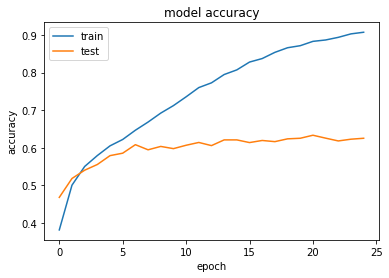

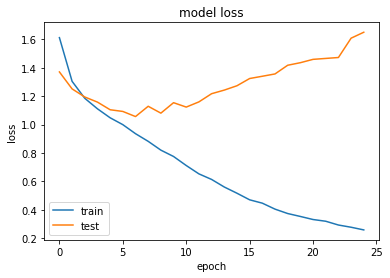

In [29]:
plotGraph(history)

In [30]:
print("=======| Model 2 |=========")
modelc = cnn_model()
history = modelc.fit(x_train_rev, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.1)
model.append(modelc)

=======| Model 2 |=========
Epoch 1/25
455/455 [==============================] - 9s 20ms/step - loss: 1.6010 - accuracy: 0.3875 - val_loss: 1.4496 - val_accuracy: 0.4430
Epoch 2/25
455/455 [==============================] - 9s 19ms/step - loss: 1.3060 - accuracy: 0.4974 - val_loss: 1.2497 - val_accuracy: 0.5155
Epoch 3/25
455/455 [==============================] - 9s 19ms/step - loss: 1.1884 - accuracy: 0.5483 - val_loss: 1.2449 - val_accuracy: 0.5251
Epoch 4/25
455/455 [==============================] - 9s 19ms/step - loss: 1.1106 - accuracy: 0.5767 - val_loss: 1.1424 - val_accuracy: 0.5656
Epoch 5/25
455/455 [==============================] - 9s 19ms/step - loss: 1.0557 - accuracy: 0.6006 - val_loss: 1.1757 - val_accuracy: 0.5641
Epoch 6/25
455/455 [==============================] - 9s 19ms/step - loss: 0.9891 - accuracy: 0.6257 - val_loss: 1.1029 - val_accuracy: 0.5824
Epoch 7/25
455/455 [==============================] - 9s 19ms/step - loss: 0.9323 - accuracy: 0.6514 - val_loss: 1

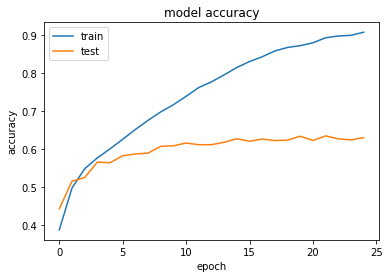

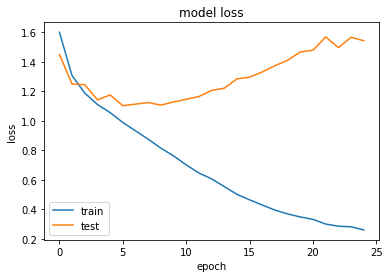

In [31]:
plotGraph(history)

In [32]:
# p_tr >> prediction on training data
# p_te >> prediction on test data

p_tr = []
p_te = []

for i, m in enumerate(model):
    if i ==0:
        p = m.predict(x_train)
        pt = m.predict(x_test)
    else:
        p = m.predict(x_train_rev)
        pt = m.predict(x_test_rev)
    p_tr.append(p)
    p_te.append(pt)
    m.save('saved_model/cnn'+str(i)+'.h5')

In [33]:
print(len(model))

2


In [34]:
p_train = np.zeros((y_train.shape[0],num_classes*len(model)))
p_test = np.zeros((y_test.shape[0],num_classes*len(model)))
for i, p in enumerate(p_tr):
    print(i)
    p_train[:,num_classes*i:num_classes*(i+1)] = p

for i, p in enumerate(p_te):
    p_test[:,num_classes*i:num_classes*(i+1)] = p
    
print(p_train.shape, p_test.shape)

0
1
(32298, 14) (3589, 14)


In [35]:
# Trains an Conventional Neural Network on previously predicted values by the two models

batch_size = 32
num_classes = 7
epochs = 30

modele = Sequential()
modele.add(Dense(128, activation='relu', input_shape=(num_classes*len(model),)))
modele.add(Dense(num_classes, activation='softmax'))

modele.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = modele.fit(p_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(p_test, y_test))
          
score = modele.evaluate(p_test, y_test, verbose=0)
modele.save('saved_model/ensemble.h5')

print('NN Based Ensembled Model')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1010/1010 [==============================] - 3s 3ms/step - loss: 2.0044 - accuracy: 0.0072 - val_loss: 1.9580 - val_accuracy: 0.0666
Epoch 2/30
1010/1010 [==============================] - 3s 3ms/step - loss: 1.9679 - accuracy: 0.2075 - val_loss: 1.9345 - val_accuracy: 0.2527
Epoch 3/30
1010/1010 [==============================] - 3s 3ms/step - loss: 1.9286 - accuracy: 0.2513 - val_loss: 1.9099 - val_accuracy: 0.2588
Epoch 4/30
1010/1010 [==============================] - 4s 3ms/step - loss: 1.8885 - accuracy: 0.2530 - val_loss: 1.8851 - val_accuracy: 0.2630
Epoch 5/30
1010/1010 [==============================] - 3s 3ms/step - loss: 1.8483 - accuracy: 0.3254 - val_loss: 1.8602 - val_accuracy: 0.3037
Epoch 6/30
1010/1010 [==============================] - 3s 3ms/step - loss: 1.8082 - accuracy: 0.4020 - val_loss: 1.8354 - val_accuracy: 0.3201
Epoch 7/30
1010/1010 [==============================] - 3s 3ms/step - loss: 1.7683 - accuracy: 0.4084 - val_loss: 1.8109 - val_accuracy: